In [58]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt 
import csv


In [59]:
data1 = []
with open("control_data.csv") as cdata:
    for row in csv.reader(cdata, delimiter=','):
        data1 += [float(d) for d in row]

data2 = []
with open("update_data.csv") as cdata:
    for row in csv.reader(cdata, delimiter=','):
        data2 += [float(d) for d in row]


datapoints: 614 testing time: 55.587466666666664
datapoints: 614 testing time: 55.587466666666664


/Applications/anaconda3/lib/python3.5/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


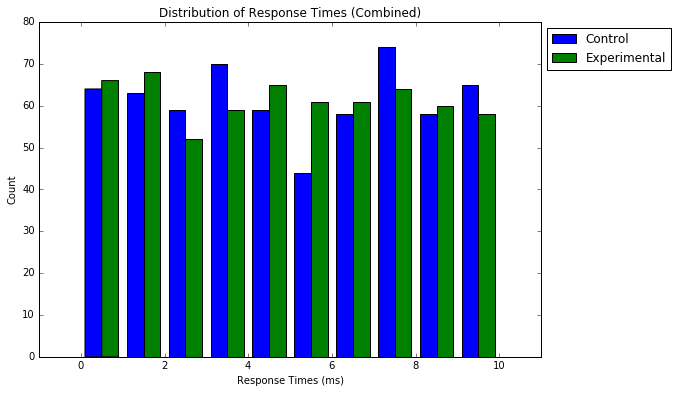

In [72]:
# Building Histogram

bins = np.linspace(0.0, 11.0, 12)

cnt1 = len(data1)
print("datapoints:", cnt1, "testing time:", (cnt1*5.432)/60)
dhist1, dbins1 = np.histogram(data1, bins=bins)

cnt2 = len(data2)
print("datapoints:", cnt2, "testing time:", (cnt2*5.432)/60)
dhist2, dbins2 = np.histogram(data2, bins=bins)
# print(dbins2)
# print(dhist2)

# dhist1 = [d/cnt for d in dhist1]
# dhist2 = [d/cnt for d in dhist2]

fig, ax = plt.subplots(figsize=(9, 6))
ax.hist([data1, data2], dbins1, color='bg', label=["Control", "Experimental"])
# ax.hist(data2, dbins2, color='g', label="Experimental")
# ax.stem(dbins1[:-1], dhist1, 'b', markerfmt='bo', label="Control")
# ax.stem(dbins2[:-1], dhist2, 'g', markerfmt='go', label="Experimental")
ax.set_title("Distribution of Response Times (Combined)")
ax.set_xlabel("Response Times (ms)")
ax.set_xlim(left=-1, right=11)
ax.set_ylabel("Count")
# ax.set_ylim(bottom=0, top=1)

ax.legend(bbox_to_anchor=(1.27,1))
fig.show()

5.003545830618896
4.936667589576549


/Applications/anaconda3/lib/python3.5/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


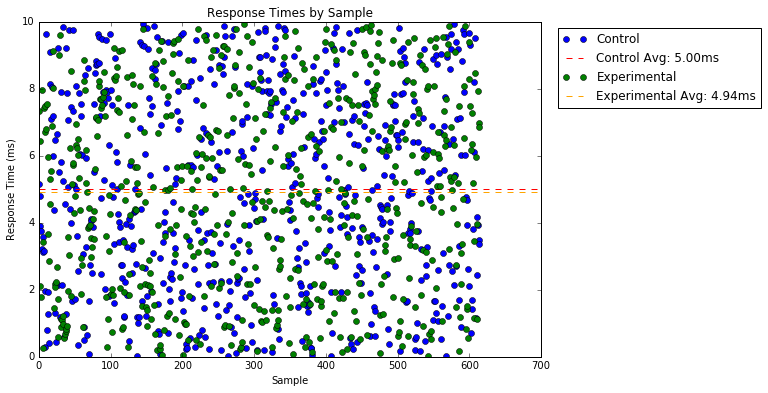

In [78]:
av1 = sum(data1) / len(data1)
print(av1)
x = np.linspace(0, len(data1), len(data1))

av2 = sum(data2) / len(data2)
print(av2)
x = np.linspace(0, len(data2), len(data2))

expav = "Experimental Avg: {av:0.2f}ms".format(av=av2)
conav = "Control Avg: {av:0.2f}ms".format(av=av1)

fig, ax = plt.subplots(figsize=(9, 6))
# ax.stem(data2, linefmt='-b', markerfmt='or')
ax.plot(x, data1, 'bo', label="Control")
ax.axhline(y=av1, color='red', linestyle='--', label=conav)
ax.plot(x, data2, 'go', label="Experimental")
ax.axhline(y=av2, color='orange', linestyle='--', label=expav)
ax.set_title("Response Times by Sample")
ax.set_ylabel("Response Time (ms)")
ax.set_xlabel("Sample")

ax.legend(bbox_to_anchor=(1.45,1))
fig.show()